In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv('dataset_normalized.csv')

<AxesSubplot:xlabel='Is_churn', ylabel='count'>

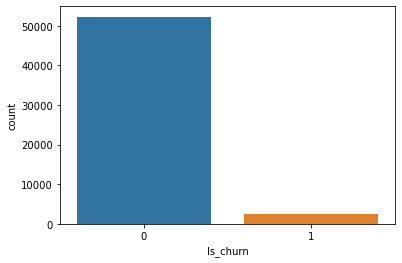

In [4]:
sns.countplot(x = 'Is_churn', data = data)

First, we split the dataset into data_train and data_test.

In [5]:
data_train, data_test = train_test_split(data, test_size = 0.2, stratify = data['Is_churn'], random_state = 999)

In [6]:
data_train['Is_churn'].value_counts()

0    41835
1     1997
Name: Is_churn, dtype: int64

In [7]:
data_test['Is_churn'].value_counts()

0    10459
1      499
Name: Is_churn, dtype: int64

<h2> OverSampling

In [10]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)


We perform OverSampling on the data_train set.

In [8]:
from imblearn.over_sampling import RandomOverSampler

In [9]:
ros = RandomOverSampler(random_state = 999)
x = data_train.drop('Is_churn', axis = 1)
y = data_train['Is_churn']
x_resampled, y_resampled = ros.fit_resample(x, y)

In [10]:
y_resampled.value_counts()

1    41835
0    41835
Name: Is_churn, dtype: int64

In [11]:
data_train = pd.concat([x_resampled, y_resampled], axis = 1)

<AxesSubplot:xlabel='Is_churn', ylabel='count'>

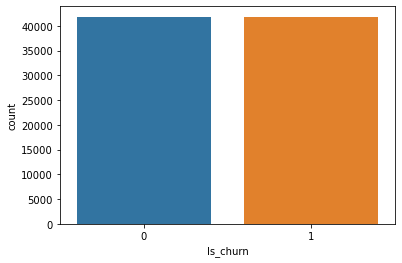

In [12]:
sns.countplot(x = 'Is_churn', data = data_train)

In [10]:
data_test.to_csv('data_test.csv', index=False)

In [11]:
data_train.to_csv('data_train_ros.csv', index=False)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_resampled, y_resampled)
y_predicted = lr.predict(x_resampled)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_resampled, y_predicted))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68     41835
           1       0.68      0.73      0.70     41835

    accuracy                           0.69     83670
   macro avg       0.69      0.69      0.69     83670
weighted avg       0.69      0.69      0.69     83670

